In [1]:
## import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/content/gurgaon_property_data_after_outliers_treatment')
df.head()

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.000000,Carpet area: 900 (83.61 sq.m.),2.0,2.0,2,4.0,West,Relatively New Property,NaN,NaN,900.0,0,0,0,0,0,1,28.0
1,flat,apna enclave,sector 3,0.50,7692.0,650.026001,Carpet area: 650 (60.39 sq.m.),2.0,2.0,2,1.0,West,Old Property,NaN,NaN,650.0,0,0,0,0,0,1,37.0
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.060994,Carpet area: 595 (55.28 sq.m.),2.0,2.0,1,12.0,NaN,New Property,NaN,NaN,595.0,0,0,0,0,0,0,36.0
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.000000,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,1,2.0,NaN,undefined,NaN,NaN,1200.0,1,0,0,0,0,0,76.0
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.119139,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3+,5.0,NaN,Under Construction,1345.0,NaN,NaN,1,0,0,0,0,0,0.0


In [3]:
## properties with unreasonably small room sizes
x=df[df['Price_per_sqrt']<=20000]
(x['Area']/x['bedRoom']).quantile(0.05)

251.1246230658955

In [4]:
df['Area_room_ratio']=df['Area']/df['bedRoom']

In [5]:
## there are the property with  unreasonably small room sizes
## we have to correct it for our analytical model ,predictive model and  recommender system
df[(df['Area']/df['bedRoom'])<188.7690305926826].sort_index()

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score,Area_room_ratio
2866,house,Independent,sector 38,2.10,23333.0,900.01,Plot area 100(83.61 sq.m.),7.0,7.0,3+,3.0,North-East,Relatively New Property,NaN,900.0,NaN,1,0,1,1,0,0,52.0,128.572857
2957,house,Independent,sector 12,1.00,8230.0,1215.00,Plot area 135(12.54 sq.m.)Built Up area: 3750 sq.ft. (348.39 sq.m.),9.0,7.0,2,3.0,North,Moderately Old,NaN,3750.0,NaN,0,0,1,1,0,0,0.0,135.000000
2958,house,Independent,sector 7,0.66,12000.0,550.00,Plot area 550(51.1 sq.m.),3.0,1.0,3,3.0,East,Relatively New Property,NaN,550.0,NaN,0,0,0,0,1,0,22.0,183.333333
2966,house,Independent,sector 7,0.90,10000.0,900.00,Plot area 100(83.61 sq.m.),6.0,4.0,1,3.0,North-East,Old Property,NaN,900.0,NaN,0,1,0,0,1,1,0.0,150.000000
2968,house,prem kunj,sohna road road,0.50,7407.0,675.04,Plot area 675(62.71 sq.m.)Built Up area: 725 sq.ft. (67.35 sq.m.)Carpet area: 675 sq.ft. (62.71 sq.m.),5.0,4.0,2,3.0,South-West,Relatively New Property,NaN,725.0,675.0,0,0,0,1,0,0,8.0,135.008000
2970,house,Independent,sector 105,0.60,13333.0,450.01,Built Up area: 450 (41.81 sq.m.),3.0,3.0,3,3.0,NaN,undefined,NaN,450.0,NaN,0,0,0,0,0,0,0.0,150.003333
2971,house,Independent,sector 3 phase 3 extension,0.50,11111.0,450.00,Plot area 450(41.81 sq.m.),5.0,3.0,3,3.0,NaN,Moderately Old,NaN,4050.0,NaN,0,0,0,0,0,0,9.0,90.000000
2982,house,Independent,manesar,0.80,6666.0,1200.12,Plot area 1200(111.48 sq.m.),8.0,8.0,3,1.0,NaN,Relatively New Property,NaN,1200.0,NaN,0,0,0,0,0,0,0.0,150.015000
2990,house,Independent,sector 12,0.90,13333.0,675.02,Built Up area: 675 (62.71 sq.m.),4.0,4.0,2,2.0,NaN,undefined,NaN,675.0,NaN,0,0,0,0,0,1,0.0,168.755000
2991,house,my home,sector 110,0.34,12592.0,270.01,Plot area 270(25.08 sq.m.),2.0,2.0,3,3.0,West,Moderately Old,NaN,2430.0,NaN,0,0,0,0,0,1,0.0,135.005000


In [6]:
## to visualize by naked eyes
df[(df['Area']/df['bedRoom'])<188.7690305926826].sort_index().to_excel('sample.xlsx',index=False)

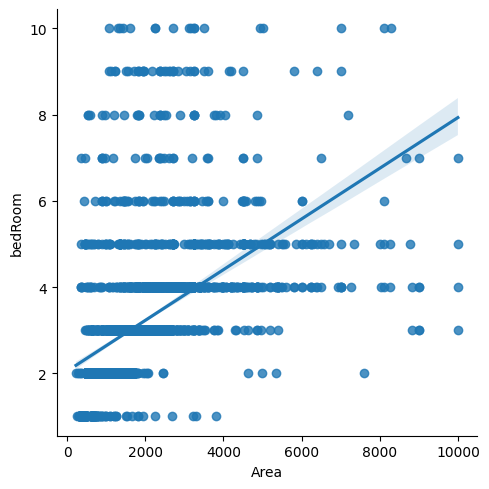

In [7]:
sns.lmplot(df,x='Area',y='bedRoom')

In [8]:
df[(df['Area']/df['bedRoom'])<252]['bedRoom'].value_counts()

,count
bedRoom,
2.0,53
3.0,40
5.0,28
6.0,17
4.0,17
9.0,15
8.0,12
7.0,8
10.0,7


In [9]:
### we can remove those columns which have area_to_room_ration less then 100
df=df[df['Area_room_ratio']>100]

In [10]:
outliers_df=df[(df['Area_room_ratio']<252) &(df['bedRoom']>3)]
outliers_df.shape

(85, 24)

In [11]:
outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])

In [12]:
df.update(outliers_df)

In [13]:
df['bedRoom'].describe()

,bedRoom
count,3613.000000
mean,3.088569
std,1.252645
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,10.000000


In [14]:
## they are considered to be data error not outliers , so we can remove it from our data
df[(df['Area_room_ratio']<252) &(df['bedRoom']>4)].shape

(13, 24)

In [15]:
df=df[~((df['Area_room_ratio']<252) &(df['bedRoom']>4))]

In [16]:
df.shape

(3600, 24)

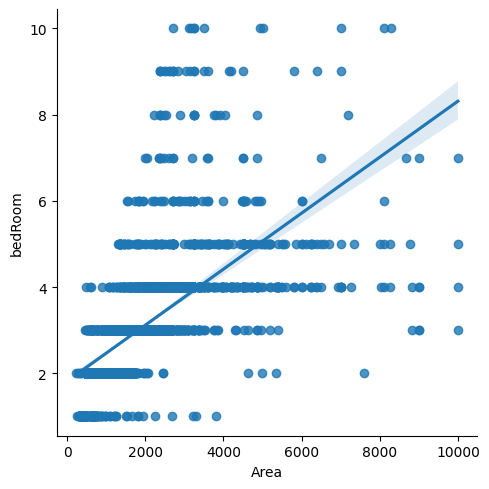

In [17]:
## dist.  looks fine know area  with less sq feet dont have high number of room (unreasonably small room sizes) which is not logical
sns.lmplot(df,x='Area',y='bedRoom')

##`Dealing with missing values`

In [18]:
df.isna().sum()

,0
Property_type,0
society,0
sector,0
price,0
Price_per_sqrt,0
Area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


##`Built_Up_area`

In [19]:
fig = px.scatter(
    df,
    x='Super_Built_up_area',
    y='Built_Up_area',
    title="Super Built-up Area vs Built-up Area"
)

# Set x and y axis limits
fig.update_layout(
    xaxis=dict(range=[0,5000]),  # Replace with desired limits for x-axis
    yaxis=dict(range=[0,5000])   # Replace with desired limits for y-axis
)

fig.show()

In [20]:
fig = px.scatter(
    df,
    x='Carpet area',
    y='Built_Up_area',
    title="Super Built-up Area vs Built-up Area"
)

# Set x and y axis limits
fig.update_layout(
    xaxis=dict(range=[0,10000]),  # Replace with desired limits for x-axis
    yaxis=dict(range=[0,10000])   # Replace with desired limits for y-axis
)

fig.show()

In [21]:
df[(df['Built_Up_area']==9000)]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score,Area_room_ratio
3045,house,anamika enclave,sector 12,6.0,14492.0,4140.22,Plot area 4140(384.62 sq.m.)Built Up area: 9000 sq.ft. (836.13 sq.m.),9.0,9.0,3,3.0,North-West,Old Property,NaN,9000.0,NaN,0,0,0,0,0,0,77.0,460.024444
3466,house,dlf alameda,sector 73,17.0,35109.0,4842.06,Plot area 4842(449.84 sq.m.)Built Up area: 9000 sq.ft. (836.13 sq.m.),5.0,8.0,2,3.0,North-West,Relatively New Property,NaN,9000.0,NaN,1,1,1,1,0,1,30.0,968.412000
3467,house,ansal sushant lok plots,sector 43,11.5,17692.0,6500.11,Plot area 3762(349.5 sq.m.)Built Up area: 9000 sq.ft. (836.13 sq.m.)Carpet area: 6500 sq.ft. (603.87 sq.m.),7.0,8.0,3,3.0,NaN,Old Property,NaN,9000.0,6500.0,0,1,1,1,0,1,22.0,928.587143
3553,house,arjun marg/ sector-,sector 26,31.5,35000.0,9000.00,Plot area 1000(836.13 sq.m.),7.0,9.0,3,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,81.0,1285.714286


In [22]:
df[(df['Built_Up_area']<1000) &(df['Carpet area']>2000)]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score,Area_room_ratio
3137,house,shri shyam residency,sector 104,0.62,12400.0,500.00,Plot area 500(46.45 sq.m.)Built Up area: 900 sq.ft. (83.61 sq.m.)Carpet area: 480 sq.ft. (44.59 sq.m.),3.0,3.0,2,2.0,NaN,Moderately Old,NaN,900.0,4320.0,0,0,0,0,1,1,0.0,166.666667
3155,house,Independent,sector 8,0.32,7111.0,450.01,Built Up area: 450 (41.81 sq.m.)Carpet area: 300 sq.ft. (27.87 sq.m.),2.0,3.0,3+,1.0,North-East,Relatively New Property,NaN,450.0,2700.0,0,0,0,0,0,0,0.0,225.005000
3228,house,Independent,sector 3 phase 2,0.40,8000.0,500.00,Built Up area: 500 (46.45 sq.m.)Carpet area: 300 sq.ft. (27.87 sq.m.),2.0,1.0,2,1.0,South,undefined,NaN,500.0,2700.0,0,0,0,0,0,0,0.0,250.000000
3383,house,Independent,sector 4,0.47,10601.0,443.35,Plot area 49(40.97 sq.m.)Built Up area: 50 sq.yards (41.81 sq.m.)Carpet area: 48 sq.yards (40.13 sq.m.),2.0,2.0,3,2.0,East,New Property,NaN,450.0,3888.0,1,0,0,0,0,1,28.0,221.675000
3488,house,sushant lok,sector 43,2.45,7756.0,3158.84,Plot area 60(50.17 sq.m.)Built Up area: 540 sq.yards (451.51 sq.m.)Carpet area: 351 sq.yards (293.48 sq.m.),4.0,4.0,3,3.0,West,Moderately Old,NaN,540.0,3159.0,1,1,0,1,1,2,34.0,789.710000


In [23]:
df.loc[[3137,3155,3228,3383],'Carpet area']=df.loc[[3137,3155,3228,3383],'Carpet area']/9

In [24]:
df[((df['Built_Up_area'].isna()) & (df['Super_Built_up_area'].isna()) & (df['Carpet area'].isna()))]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score,Area_room_ratio


In [25]:
df[~((df['Built_Up_area'].isna()) | (df['Super_Built_up_area'].isna()) | (df['Carpet area'].isna()))].shape

(532, 24)

In [26]:
all_present=df[~((df['Built_Up_area'].isna()) | (df['Super_Built_up_area'].isna()) | (df['Carpet area'].isna()))]
all_present.sample(10)

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score,Area_room_ratio
1452,flat,vatika gurgaon,sector 83,0.95,6574.0,1445.086705,Super Built up area 1445(134.24 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.),2.0,2.0,3,5.0,South,Relatively New Property,1445.0,1300.0,1200.00,0,0,0,0,0,1,96.0,722.543353
1238,flat,mariners home,sector 56,2.11,8612.0,2450.069670,Super Built up area 2450(227.61 sq.m.)Built Up area: 2250 sq.ft. (209.03 sq.m.)Carpet area: 2150 sq.ft. (199.74 sq.m.),3.0,2.0,3,4.0,South,Relatively New Property,2450.0,2250.0,2150.00,0,0,0,0,1,1,140.0,816.689890
1073,flat,the close north,sector 50,2.35,11767.0,1997.110563,Super Built up area 1997(185.53 sq.m.)Built Up area: 1950 sq.ft. (181.16 sq.m.)Carpet area: 1850 sq.ft. (171.87 sq.m.),3.0,3.0,2,8.0,North-East,Moderately Old,1997.0,1950.0,1850.00,0,0,0,0,0,1,103.0,665.703521
918,flat,corona optus,sector 37c,1.26,7250.0,1737.931034,Super Built up area 1735(161.19 sq.m.)Built Up area: 1400 sq.ft. (130.06 sq.m.)Carpet area: 965 sq.ft. (89.65 sq.m.),3.0,3.0,1,4.0,North-East,New Property,1735.0,1400.0,965.00,0,0,0,0,0,0,127.0,579.310345
1623,flat,orchid petals,sector 49,2.35,11559.0,2033.047842,Super Built up area 2033(188.87 sq.m.)Built Up area: 2030 sq.ft. (188.59 sq.m.)Carpet area: 1750 sq.ft. (162.58 sq.m.),3.0,3.0,3,15.0,West,Relatively New Property,2033.0,2030.0,1750.00,0,0,0,0,1,1,49.0,677.682614
435,flat,tulip purple,sector 69,1.80,9000.0,2000.000000,Super Built up area 2400(222.97 sq.m.)Built Up area: 2200 sq.ft. (204.39 sq.m.)Carpet area: 2000 sq.ft. (185.81 sq.m.),4.0,5.0,3,4.0,North-East,Relatively New Property,2400.0,2200.0,2000.00,0,1,0,0,0,1,168.0,500.000000
1274,flat,emaar palm gardens,sector 83,1.75,9210.0,1900.108578,Super Built up area 1900(176.52 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1240.04 sq.ft. (115.2 sq.m.),3.0,3.0,3,6.0,East,Relatively New Property,1900.0,1600.0,1240.04,0,1,0,0,0,1,111.0,633.369526
1196,flat,paras dews,sector 106,0.92,6642.0,1385.124962,Super Built up area 1385(128.67 sq.m.)Built Up area: 940 sq.ft. (87.33 sq.m.)Carpet area: 845 sq.ft. (78.5 sq.m.),2.0,2.0,3,2.0,East,Relatively New Property,1385.0,940.0,845.00,0,0,0,0,0,1,165.0,692.562481
1561,flat,experion windchants,sector 112,3.00,11538.0,2600.104004,Super Built up area 2802(260.31 sq.m.)Built Up area: 2600 sq.ft. (241.55 sq.m.)Carpet area: 2200 sq.ft. (204.39 sq.m.),3.0,3.0,2,2.0,North,Relatively New Property,2802.0,2600.0,2200.00,0,0,0,0,1,1,49.0,866.701335
1497,flat,ss,sector 85,2.14,7610.0,2812.089356,Super Built up area 2812(261.24 sq.m.)Built Up area: 2300 sq.ft. (213.68 sq.m.)Carpet area: 2000 sq.ft. (185.81 sq.m.),4.0,4.0,3+,6.0,North,Relatively New Property,2812.0,2300.0,2000.00,1,1,0,1,0,1,49.0,703.022339


In [27]:
super_to_build_up_area=(df['Super_Built_up_area']/df['Built_Up_area']).median()
carpet_to_build_up_ratio=(df['Carpet area']/df['Built_Up_area']).median()

In [28]:
print(super_to_build_up_area,carpet_to_build_up_ratio)

1.111814556331007 0.8888888888888888


In [29]:
### where only build_up_area is missing
only_build_up_area_missing=df[(df['Built_Up_area'].isna()) & ~(df['Super_Built_up_area'].isna()) & ~(df['Carpet area'].isna())]
only_build_up_area_missing.sample(10)

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score,Area_room_ratio
2664,flat,ambience creacions,sector 22,2.79,15000.0,1860.000000,Super Built up area 1860(172.8 sq.m.)Carpet area: 1300 sq.ft. (120.77 sq.m.),3.0,3.0,0,13.0,East,New Property,1860.0,NaN,1300.0,0,0,0,0,0,1,0.0,620.000000
434,flat,bestech park view ananda,sector 81,1.35,7541.0,1790.213500,Super Built up area 1790(166.3 sq.m.)Carpet area: 1130 sq.ft. (104.98 sq.m.),3.0,3.0,3+,10.0,North-East,Moderately Old,1790.0,NaN,1130.0,0,0,1,0,0,1,165.0,596.737833
1548,flat,aipl the peaceful homes,sector 70a,2.50,11627.0,2150.167713,Super Built up area 2150(199.74 sq.m.)Carpet area: 1350 sq.ft. (125.42 sq.m.),3.0,3.0,3,15.0,North-East,Relatively New Property,2150.0,NaN,1350.0,0,0,0,0,1,1,158.0,716.722571
453,flat,m3m merlin,sector 67,3.40,14418.0,2358.163407,Super Built up area 2358(219.07 sq.m.)Carpet area: 1708 sq.ft. (158.68 sq.m.),3.0,4.0,3,16.0,North-West,Relatively New Property,2358.0,NaN,1708.0,0,1,0,0,0,1,174.0,786.054469
1213,flat,corona optus,sector 37c,1.44,7236.0,1990.049751,Super Built up area 1990(184.88 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.),3.0,3.0,3+,2.0,North-West,Relatively New Property,1990.0,NaN,1600.0,1,1,0,0,1,0,49.0,663.349917
1962,flat,raheja atharva,sector 109,0.79,7931.0,996.091287,Super Built up area 1457(135.36 sq.m.)Carpet area: 996 sq.ft. (92.53 sq.m.),3.0,2.0,3,3.0,NaN,Relatively New Property,1457.0,NaN,996.0,0,0,0,0,0,1,73.0,332.030429
278,flat,ss almeria,sector 84,1.48,7400.0,2000.000000,Super Built up area 2000(185.81 sq.m.)Carpet area: 1294 sq.ft. (120.22 sq.m.),3.0,3.0,2,1.0,South-West,New Property,2000.0,NaN,1294.0,0,1,1,0,0,1,130.0,666.666667
2138,flat,signature global grand iva,sector 103,0.50,6250.0,800.000000,Super Built up area 800(74.32 sq.m.)Carpet area: 605 sq.ft. (56.21 sq.m.),2.0,2.0,2,10.0,NaN,Relatively New Property,800.0,NaN,605.0,0,0,0,0,0,1,52.0,400.000000
1312,flat,suncity avenue,sector 102,0.48,8928.0,537.634409,Super Built up area 632(58.71 sq.m.)Carpet area: 532 sq.ft. (49.42 sq.m.),2.0,2.0,1,5.0,South-East,Relatively New Property,632.0,NaN,532.0,0,0,1,0,0,1,158.0,268.817204
1231,flat,pivotal devaan,sector 84,0.34,5831.0,583.090379,Super Built up area 583(54.16 sq.m.)Carpet area: 484 sq.ft. (44.97 sq.m.),2.0,2.0,3+,3.0,East,Relatively New Property,583.0,NaN,484.0,0,0,1,0,0,0,103.0,291.545190


In [30]:
## we can fill missing values of bulidup area where both carpet and super_build_up_area is give
## by avg. of both carpet and super_build_up_area with median as a wt. parameter
only_build_up_area_missing['Built_Up_area'] = only_build_up_area_missing['Built_Up_area'].fillna(
    round(
        ((only_build_up_area_missing['Super_Built_up_area'] * 1.111814556331007) +
         (only_build_up_area_missing['Carpet area'] * 0.888888)) / 2
    )
)

In [31]:
df.update(only_build_up_area_missing)

In [32]:
df['Built_Up_area'].isna().sum()

1581

In [33]:
### where  build_up_area is missing but super_build_up_area is given
build_up_area_and_carpet_area_missing=df[(df['Built_Up_area'].isna()) & ~(df['Super_Built_up_area'].isna()) & (df['Carpet area'].isna())]
build_up_area_and_carpet_area_missing.sample(10)

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score,Area_room_ratio
2698,flat,corona gracieux,sector 76,0.75,5660.0,1325.088339,Super Built up area 1325(123.1 sq.m.),2.0,2.0,3+,13.0,NaN,Relatively New Property,1325.0,NaN,NaN,0,0,0,0,0,1,0.0,662.544170
1286,flat,ats triumph,sector 104,2.50,7936.0,3150.201613,Super Built up area 3150(292.64 sq.m.),4.0,4.0,3,14.0,North-East,New Property,3150.0,NaN,NaN,0,1,0,0,0,0,158.0,787.550403
13,flat,godrej,sector 33,0.95,6859.0,1385.041551,Super Built up area 1385(128.67 sq.m.),2.0,2.0,3,3.0,South-East,Under Construction,1385.0,NaN,NaN,0,0,0,0,0,0,0.0,692.520776
455,flat,bestech park view residency,sector 2,0.95,6713.0,1415.164606,Super Built up area 1415(131.46 sq.m.),2.0,2.0,1,1.0,North-East,Moderately Old,1415.0,NaN,NaN,0,0,0,0,0,1,137.0,707.582303
1963,flat,breez global heights,sohna road,0.42,6420.0,654.205607,Super Built up area 623(57.88 sq.m.),2.0,2.0,3+,2.0,NaN,New Property,623.0,NaN,NaN,0,0,0,0,0,0,16.0,327.102804
2791,flat,imperia the esfera,sector 37c,0.70,4879.0,1434.720230,Super Built up area 1435(133.32 sq.m.),2.0,3.0,1,12.0,North,Under Construction,1435.0,NaN,NaN,1,0,0,0,1,0,0.0,717.360115
92,flat,central park flower valley aqua front towers,sector 33,2.10,11738.0,1789.061169,Super Built up area 1789(166.2 sq.m.),3.0,3.0,2,6.0,NaN,Under Construction,1789.0,NaN,NaN,0,0,0,0,0,0,49.0,596.353723
1190,flat,krrish provence estate,gwal pahari,5.50,9482.0,5800.464037,Super Built up area 5800(538.84 sq.m.),4.0,5.0,3,11.0,East,New Property,5800.0,NaN,NaN,1,1,0,1,0,0,49.0,1450.116009
465,flat,m3m skywalk,sector 74,2.20,10901.0,2018.163471,Super Built up area 2018(187.48 sq.m.),3.0,3.0,2,12.0,NaN,New Property,2018.0,NaN,NaN,1,0,0,0,0,1,88.0,672.721157
1604,flat,ss hibiscus,sector 50,6.00,12272.0,4889.178618,Super Built up area 4400(408.77 sq.m.),4.0,3.0,3,5.0,South-East,Moderately Old,4400.0,NaN,NaN,0,1,0,0,0,1,35.0,1222.294654


In [34]:
build_up_area_and_carpet_area_missing['Built_Up_area']=build_up_area_and_carpet_area_missing['Built_Up_area'].fillna(round(df['Super_Built_up_area']/1.111814556331007))

In [35]:
df.update(build_up_area_and_carpet_area_missing)

In [36]:
df['Built_Up_area'].isna().sum()

697

In [37]:
### where  build_up_area is missing but Carpet_area is given
build_up_area_and_super_missing=df[(df['Built_Up_area'].isna()) & (df['Super_Built_up_area'].isna()) & ~(df['Carpet area'].isna())]
build_up_area_and_super_missing.sample(10)

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score,Area_room_ratio
110,flat,not applicable,sector 4,0.42,5600.0,750.000000,Carpet area: 750 (69.68 sq.m.),2.0,2.0,2,3.0,NaN,Relatively New Property,NaN,NaN,750.0,0,0,0,0,0,1,43.0,375.000000
2621,flat,satya element one,sector 49,0.94,14009.0,670.997216,Carpet area: 671 (62.34 sq.m.),1.0,2.0,2,2.0,East,undefined,NaN,NaN,671.0,0,0,0,0,0,0,60.0,670.997216
645,flat,dlf the crest,sector 54,11.00,35483.0,3100.076093,Carpet area: 3100 (288 sq.m.),4.0,5.0,2,7.0,North-East,Relatively New Property,NaN,NaN,3100.0,1,1,0,1,0,1,28.0,775.019023
2092,flat,supertech araville,sector 79,1.00,6535.0,1530.221882,Carpet area: 1530 (142.14 sq.m.),2.0,2.0,3,4.0,NaN,Relatively New Property,NaN,NaN,1530.0,1,0,0,0,0,1,49.0,765.110941
1824,flat,emaar mgf emerald floors premier,sector 65,2.24,13575.0,1650.092081,Carpet area: 1650 (153.29 sq.m.),3.0,3.0,3,2.0,North-West,Relatively New Property,NaN,NaN,1650.0,1,1,0,0,0,0,21.0,550.030694
1410,flat,signature global park,sohna road,0.52,6326.0,822.004426,Carpet area: 822 (76.37 sq.m.),2.0,2.0,3,3.0,North-West,Relatively New Property,NaN,NaN,822.0,0,0,0,1,0,0,165.0,411.002213
1,flat,apna enclave,sector 3,0.50,7692.0,650.026001,Carpet area: 650 (60.39 sq.m.),2.0,2.0,2,1.0,West,Old Property,NaN,NaN,650.0,0,0,0,0,0,1,37.0,325.013001
306,flat,emaar digihomes,sector 62,2.15,14257.0,1508.031143,Carpet area: 1508 (140.1 sq.m.),2.0,2.0,3,31.0,NaN,Under Construction,NaN,NaN,1508.0,0,0,0,0,0,0,65.0,754.015571
226,flat,sare homes,sector 92,0.60,5000.0,1200.000000,Carpet area: 1200 (111.48 sq.m.),3.0,2.0,3,4.0,NaN,Moderately Old,NaN,NaN,1200.0,0,0,0,0,0,1,60.0,400.000000
83,flat,huda ashok vihar phase,sector 4,0.43,6615.0,650.037793,Carpet area: 650 (60.39 sq.m.),2.0,2.0,3+,2.0,NaN,Relatively New Property,NaN,NaN,650.0,0,0,0,0,0,1,15.0,325.018896


In [38]:
build_up_area_and_super_missing['Built_Up_area']=build_up_area_and_super_missing['Built_Up_area'].fillna(round(build_up_area_and_super_missing['Carpet area']/0.888888))

In [39]:
df.update(build_up_area_and_super_missing)

In [40]:
df['Built_Up_area'].isna().sum()

0

In [41]:
px.scatter(df,x='Built_Up_area',y='price')

In [42]:
df[(df['Built_Up_area']<=1500) & (df['price']>2.5)][['Built_Up_area','Area','price']].sort_values(by='Built_Up_area')

,Built_Up_area,Area,price
3402,359.00,3231.000000,8.45
3469,360.00,3239.950000,8.20
3463,360.00,3239.980000,11.95
3470,361.00,3243.080000,5.51
3285,480.00,4320.090000,6.50
3392,502.00,4518.070000,13.50
3370,502.00,4518.030000,17.00
3494,502.00,4518.070000,13.50
3369,502.00,4517.960000,18.00
3394,502.00,4517.960000,18.00


In [43]:
anamoly_df=df[(df['Built_Up_area']<=1500) & (df['price']>2.5)][['Built_Up_area','Area','price']]

In [44]:
anamoly_df['Built_Up_area']=anamoly_df['Area']

In [45]:
df.update(anamoly_df)

In [46]:
px.scatter(df,x='Built_Up_area',y='price')

##`build_up_area is cleaned`
## `this is area column  i will we using in predictive model`

In [47]:
df=df.drop(columns=['Super_Built_up_area','Carpet area','Area_room_ratio','areaWithType'])

In [48]:
df.shape

(3600, 20)

In [49]:
df.head()

,Property_type,society,sector,price,Price_per_sqrt,Area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_Up_area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.000000,2.0,2.0,2,4.0,West,Relatively New Property,1013.0,0,0,0,0,0,1,28.0
1,flat,apna enclave,sector 3,0.50,7692.0,650.026001,2.0,2.0,2,1.0,West,Old Property,731.0,0,0,0,0,0,1,37.0
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.060994,2.0,2.0,1,12.0,NaN,New Property,669.0,0,0,0,0,0,0,36.0
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.000000,2.0,2.0,1,2.0,NaN,undefined,1350.0,1,0,0,0,0,0,76.0
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.119139,2.0,2.0,3+,5.0,NaN,Under Construction,1210.0,1,0,0,0,0,0,0.0


In [50]:
df.isna().sum()

,0
Property_type,0
society,0
sector,0
price,0
Price_per_sqrt,0
Area,0
bedRoom,0
bathroom,0
balcony,0
floorNum,16


##`FloorNum`

In [51]:
df[df['floorNum'].isna()]

,Property_type,society,sector,price,Price_per_sqrt,Area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_Up_area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
171,flat,experion heartsong,dwarka expressway,1.08,6150.0,1756.097561,3.0,3.0,3,NaN,NaN,Under Construction,1758.00,0,0,0,0,0,0,53.0
2872,house,vipul tatvam villa,sector 48,8.50,26235.0,3239.950000,4.0,4.0,3,NaN,East,Moderately Old,3240.00,0,1,1,1,0,1,84.0
2891,house,Independent,sector 2,5.60,17284.0,3239.990000,8.0,6.0,3+,NaN,South-West,Moderately Old,3240.00,1,1,1,1,0,1,129.0
2960,house,Independent,sector 24,1.45,2984.0,4860.000000,3.0,3.0,0,NaN,NaN,Old Property,540.00,0,0,0,0,0,0,25.0
2996,house,Independent,sector 3,1.50,10288.0,1458.010000,3.0,3.0,3,NaN,NaN,Old Property,1890.00,0,0,0,0,0,0,0.0
3011,house,Independent,sector 4,4.12,8889.0,4634.940000,2.0,1.0,3,NaN,NaN,Moderately Old,4634.94,0,0,0,0,0,0,0.0
3064,house,Independent,sector 4,0.65,11111.0,585.010000,4.0,2.0,3,NaN,NaN,Moderately Old,585.00,0,0,0,0,0,1,0.0
3080,house,ansal sushant lok plots,sector 43,3.30,26570.0,1242.000000,1.0,1.0,3+,NaN,NaN,Under Construction,1242.00,0,0,0,0,0,0,44.0
3205,house,jacob pura,sector 12,0.35,9722.0,360.010000,2.0,1.0,0,NaN,NaN,Old Property,360.00,0,0,0,0,0,0,0.0
3232,house,Independent,sector 25,13.00,45710.0,2844.020000,6.0,8.0,2,NaN,NaN,Relatively New Property,2844.00,1,1,1,1,0,1,53.0


In [52]:
df[df['floorNum'].isna()].index

Index([ 171, 2872, 2891, 2960, 2996, 3011, 3064, 3080, 3205, 3232, 3285, 3416,
       3433, 3438, 3441, 3557],
      dtype='int64')

In [53]:
df[df['Property_type']=='house']['floorNum'].median()

2.0

In [54]:
df['floorNum']=df['floorNum'].fillna(2.0)

In [55]:
df[df['floorNum'].index.isin([171, 2872, 2891, 2960, 2996, 3011, 3064, 3080, 3205, 3232, 3285, 3416,
       3433, 3438, 3441, 3557])]

,Property_type,society,sector,price,Price_per_sqrt,Area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_Up_area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
171,flat,experion heartsong,dwarka expressway,1.08,6150.0,1756.097561,3.0,3.0,3,2.0,NaN,Under Construction,1758.00,0,0,0,0,0,0,53.0
2872,house,vipul tatvam villa,sector 48,8.50,26235.0,3239.950000,4.0,4.0,3,2.0,East,Moderately Old,3240.00,0,1,1,1,0,1,84.0
2891,house,Independent,sector 2,5.60,17284.0,3239.990000,8.0,6.0,3+,2.0,South-West,Moderately Old,3240.00,1,1,1,1,0,1,129.0
2960,house,Independent,sector 24,1.45,2984.0,4860.000000,3.0,3.0,0,2.0,NaN,Old Property,540.00,0,0,0,0,0,0,25.0
2996,house,Independent,sector 3,1.50,10288.0,1458.010000,3.0,3.0,3,2.0,NaN,Old Property,1890.00,0,0,0,0,0,0,0.0
3011,house,Independent,sector 4,4.12,8889.0,4634.940000,2.0,1.0,3,2.0,NaN,Moderately Old,4634.94,0,0,0,0,0,0,0.0
3064,house,Independent,sector 4,0.65,11111.0,585.010000,4.0,2.0,3,2.0,NaN,Moderately Old,585.00,0,0,0,0,0,1,0.0
3080,house,ansal sushant lok plots,sector 43,3.30,26570.0,1242.000000,1.0,1.0,3+,2.0,NaN,Under Construction,1242.00,0,0,0,0,0,0,44.0
3205,house,jacob pura,sector 12,0.35,9722.0,360.010000,2.0,1.0,0,2.0,NaN,Old Property,360.00,0,0,0,0,0,0,0.0
3232,house,Independent,sector 25,13.00,45710.0,2844.020000,6.0,8.0,2,2.0,NaN,Relatively New Property,2844.00,1,1,1,1,0,1,53.0


##`Facing`

In [56]:
indices=df[df['floorNum'].isna()].index

In [57]:
px.pie(names=df['facing'].value_counts().index,values=df['facing'].value_counts().values)

In [58]:
(1033/df.shape[0])*100

28.694444444444443

In [59]:
df.shape[0]

3600

In [60]:
## as there are 28% missing data facing is not that usefull column because we have only 3600 rows
df=df.drop(columns=['facing'])
df.shape

(3600, 19)

##`age possession`

In [61]:
df[df['agePossession']=='undefined'].shape

(441, 19)

In [62]:
df[df['agePossession']=='undefined']

,Property_type,society,sector,price,Price_per_sqrt,Area,bedRoom,bathroom,balcony,floorNum,agePossession,Built_Up_area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.000000,2.0,2.0,1,2.0,undefined,1350.000000,1,0,0,0,0,0,76.0
5,flat,signature global infinity mall,sector 36,0.41,6269.0,654.011804,2.0,2.0,1,3.0,undefined,654.000000,0,0,0,0,0,0,0.0
9,flat,raheja revanta,sector 78,4.75,16885.0,2813.147764,3.0,3.0,1,31.0,undefined,2813.000000,0,1,0,0,0,0,100.0
10,flat,signature global city 81,sector 81,0.96,9767.0,982.901607,2.0,2.0,2,1.0,undefined,1209.000000,0,0,0,0,0,0,49.0
15,flat,sobha city,sector 108,3.95,16859.0,2342.962216,4.0,5.0,2,25.0,undefined,2343.000000,0,0,0,0,0,1,59.0
16,flat,senate court,sector 62,0.90,14084.0,639.023005,1.0,1.0,3,0.0,undefined,639.000000,0,0,0,0,0,0,0.0
17,flat,shapoorji pallonji joyville gurugram,sector 102,1.05,11475.0,915.032680,2.0,2.0,3,0.0,undefined,1029.000000,0,0,0,0,0,0,49.0
19,flat,smart world gems,sector 89,1.01,9156.0,1103.101791,2.0,2.0,3+,4.0,undefined,1241.000000,1,0,0,0,0,0,49.0
24,flat,the serenas,sector 36,0.42,7910.0,530.973451,2.0,2.0,1,3.0,undefined,597.000000,0,0,0,0,0,1,34.0
25,flat,m3m golfestate,sector 65,6.15,18331.0,3354.972451,3.0,4.0,3+,20.0,undefined,3355.000000,0,0,0,0,0,0,49.0


In [63]:
def mode_based_imutation(row):
  if row['agePossession']=='undefined':
    mode_value=df[(df['sector']==row['sector']) & (df['Property_type']==row['Property_type'])]['agePossession'].mode()
    if not mode_value.empty:
      return mode_value.iloc[0]
    else:
      return np.nan
  else:
    return row['agePossession']

In [64]:
df['agePossession']=df.apply(mode_based_imutation,axis=1)

In [65]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New Property,1816
New Property,637
Moderately Old,592
Old Property,327
Under Construction,129
undefined,99


In [66]:
def mode_based_imutation2(row):
  if row['agePossession']=='undefined':
    mode_value=df[(df['sector']==row['sector'])]['agePossession'].mode()
    if not mode_value.empty:
      return mode_value.iloc[0]
    else:
      return np.nan
  else:
    return row['agePossession']

In [67]:
df['agePossession']=df.apply(mode_based_imutation2,axis=1)

In [68]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New Property,1832
New Property,660
Moderately Old,599
Old Property,338
Under Construction,129
undefined,42


In [69]:
def mode_based_imutation3(row):
  if row['agePossession']=='undefined':
    mode_value=df[(df['Property_type']==row['Property_type'])]['agePossession'].mode()
    if not mode_value.empty:
      return mode_value.iloc[0]
    else:
      return np.nan
  else:
    return row['agePossession']

In [70]:
df['agePossession']=df.apply(mode_based_imutation3,axis=1)

In [71]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New Property,1848
New Property,660
Moderately Old,625
Old Property,338
Under Construction,129


In [72]:
df.isna().sum()

,0
Property_type,0
society,0
sector,0
price,0
Price_per_sqrt,0
Area,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0


In [73]:
df.shape

(3600, 19)

#`luxury_score`

In [74]:
df[df['luxury_score'].isna()]

,Property_type,society,sector,price,Price_per_sqrt,Area,bedRoom,bathroom,balcony,floorNum,agePossession,Built_Up_area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
3581,house,Independent,sector 17,9.50,23457.0,4049.96,8.0,8.0,3,3.0,Relatively New Property,4500.00,1,0,0,0,0,2,NaN
3582,house,Independent,sector 14,5.50,16975.0,3240.06,5.0,4.0,3+,2.0,Old Property,3195.00,1,0,0,0,0,0,NaN
3583,house,Independent,sector 14,6.46,18889.0,3419.98,5.0,5.0,3+,3.0,Moderately Old,3420.00,1,1,0,1,0,1,NaN
3584,house,godrej meridien,sector 106,5.60,14000.0,4000.00,5.0,4.0,3,33.0,New Property,4000.00,1,1,1,1,0,1,NaN
3585,house,Independent,sector 28,10.50,32407.0,3240.04,5.0,6.0,3+,3.0,New Property,3240.00,1,1,0,1,0,2,NaN
3586,house,Independent,sector 57,8.00,29630.0,2700.00,5.0,4.0,2,2.0,Relatively New Property,2700.00,1,1,0,1,0,1,NaN
3587,house,international city by sobha phase 2,sector 109,6.44,26502.0,2430.01,4.0,5.0,3+,3.0,New Property,2430.00,1,1,1,1,0,0,NaN
3588,house,Independent,sector 56,7.50,23148.0,3240.02,8.0,8.0,3,3.0,Relatively New Property,3240.00,1,1,0,1,0,2,NaN
3589,house,unitech aspen greens,sector 50,7.00,32407.0,2160.03,4.0,4.0,2,2.0,Old Property,2160.00,0,1,0,0,0,1,NaN
3590,house,ss aaron ville,sector 49,6.50,18808.0,3455.98,5.0,5.0,3,2.0,Relatively New Property,3456.00,1,1,0,1,0,2,NaN


In [75]:
df.dropna(inplace=True)

In [76]:
df.shape

(3550, 19)

In [77]:
df.to_csv('gurgaon_property_data_after_Missing_Value_Imputation',index=False)